In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.ticker import PercentFormatter


# Data Visualization II

## Stacked Area Chart


Used to discover trends and patterns in the data. Appropriate when we want to compare volume among categories. Also, when we have data with at least 3 variables (ex: year, type, number of cars per type)and at least 2 them should be numerical and have an order (year, number of cars per type). Do NOT use area charts when you have more than 6-7 categories. Also, if the category sizes are very similar to each other.

In [2]:
df_fuel_engine_types = pd.read_csv("./stacked_area_chart_data.csv")
df_fuel_engine_types

,Year,Gas,Petrol,Diesel,Other
0,1982,0,94,0,0
1,1983,0,347,0,0
2,1984,300,0,334,0
3,1985,1030,1184,984,0
4,1986,511,681,1066,340
5,1987,1817,1840,400,940
6,1988,2999,1882,2060,1
7,1989,2626,1641,1304,330
8,1990,1290,3247,1,0
9,1991,1566,6776,1063,400


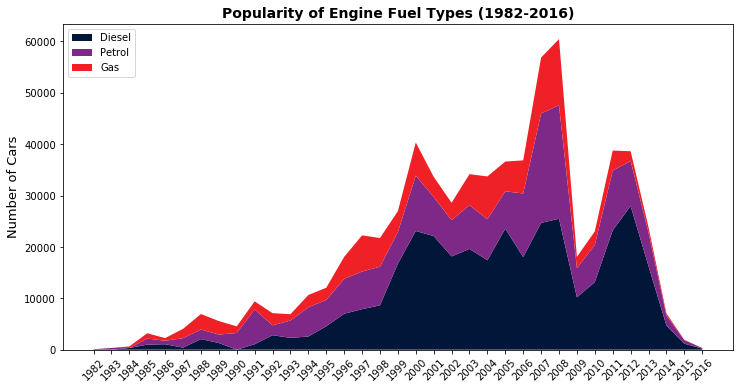

In [6]:
colors = ["#011638", "#7e2987", "#ef2026"] #usually you'd like to use your organization's colors
labels = ["Diesel", "Petrol", "Gas"] #labels for the legend
plt.figure(figsize=(12,6))
plt.stackplot(df_fuel_engine_types["Year"], 
              df_fuel_engine_types["Diesel"],
              df_fuel_engine_types["Petrol"],
              df_fuel_engine_types["Gas"],
              colors=colors,edgecolor='none') #to remove edges between the stacked areas
plt.xticks(df_fuel_engine_types["Year"], rotation=45) #specify xticks to have all the years on the x-axis
plt.legend(labels=labels, loc="upper left")
plt.ylabel("Number of Cars", fontsize=13)
plt.title("Popularity of Engine Fuel Types (1982-2016)", fontsize=14, weight="bold")
#sns.despine() #remove the right and upper edges of the graph
plt.show()

Make sure to format the graph to make the information you want to convey clear. Compare between the graphs above and below.

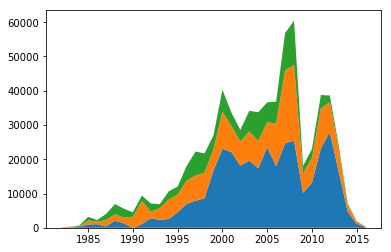

In [7]:
plt.stackplot(df_fuel_engine_types["Year"], 
              df_fuel_engine_types["Diesel"],
              df_fuel_engine_types["Petrol"],
              df_fuel_engine_types["Gas"])

## Line and Bar Chart

This chart has dual y axes. The left y-axis is the primary one and it refers to the bars. It displays the number of occurrences. The right y-axis is the secondary one and it refers to the line chart. It is used to display percentages.

In [8]:
df_kd_nuggets = pd.read_csv("./bar_line_chart_data.csv")
df_kd_nuggets

,Year,Python Users,Participants
0,2012,0.149,798
1,2013,0.133,1880
2,2014,0.195,3285
3,2015,0.303,2800
4,2016,0.458,2895
5,2017,0.526,2900
6,2018,0.656,2300
7,2019,0.658,1800


Text(0.5,1,'KD Nuggets Survey Python Users (2012-2019)')

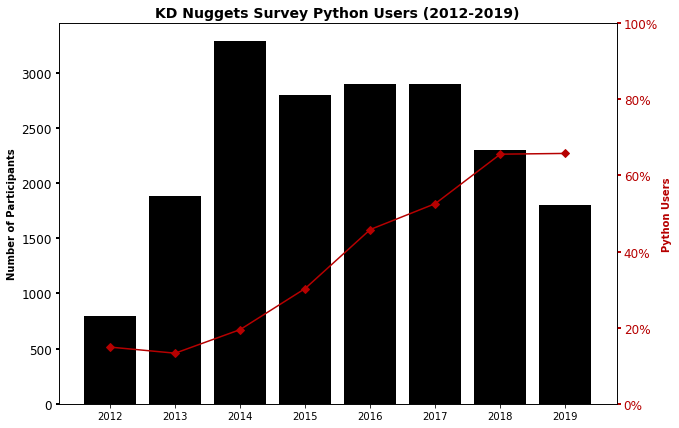

In [10]:
fig, ax = plt.subplots(figsize=(10,7)) #the figure is the complete figure which encompasses all elements in the chart. the axes is the actual plot we are creating. a figure can contain multiple axes.
ax.bar(df_kd_nuggets["Year"], 
       df_kd_nuggets["Participants"],
       color="k")
ax.set_ylabel("Number of Participants",
              weight="bold")
ax.tick_params(axis="y",
                width=2,
                labelsize="large")
ax1 = ax.twinx() #means that ax and ax1 will have a twin x-axis
ax1.set_ylim(0,1) #to make the y-axis show values from 0 to 100
ax1.yaxis.set_major_formatter(PercentFormatter(xmax=1.0)) # to make the secondary y-axis in percentage instead of decimal
ax1.plot(df_kd_nuggets["Year"],
         df_kd_nuggets["Python Users"], 
         color="#b60000", #hex code for dark red
         marker="D") #diamond shape for markers
ax1.set_ylabel("Python Users",
               color="#b60000",
               weight="bold")
ax1.tick_params(axis="y",
               colors="#b60000",
                width=2,
                labelsize="large")
ax.set_title("KD Nuggets Survey Python Users (2012-2019)",
             fontsize=14,
             weight="bold") #ax1.set_title() will work as well since they share the same figure

Without formatting:

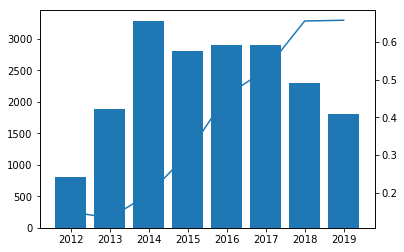

In [11]:
fig, ax = plt.subplots() #the figure is the complete figure which encompasses all elements in the chart. the axes is the actual plot we are creating. a figure can contain multiple axes.
ax.bar(df_kd_nuggets["Year"], 
       df_kd_nuggets["Participants"])

ax1 = ax.twinx() #means that ax and ax1 will have a twin x-axis

ax1.plot(df_kd_nuggets["Year"],
         df_kd_nuggets["Python Users"])#diamond shape for markers


# Data Cleaning

Examples of data cleaning include cleaning:

1.   **Missing Data**
2.   **Irregular Data** (Outliers)
3.   **Unnecessary Data** — Repetitive Data, Duplicates and more
4.   **Inconsistent Data** — Capitalization, Addresses and more

Almost any dataset that you are going to be working with is going to have missing data. So learning how to deal with missing values is essential. 

Let's start with a small toy datset.

In [12]:
people = {
    'first': ['Corey', 'Jane', 'John', 'Chris', np.nan, None, 'NA'], 
    'last': ['Schafer', 'Doe', 'Doe', 'Schafer', np.nan, np.nan, 'Missing'], 
    'email': ['CoreyMSchafer@gmail.com', 'JaneDoe@email.com', 'JohnDoe@email.com', None, np.nan, 'Anonymous@email.com', 'NA'],
    'age': ['33', '55', '63', '36', None, None, 'Missing']
}

In [16]:
df_people = pd.DataFrame(people)
df_people

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36
4,NaN,NaN,NaN,None
5,None,NaN,Anonymous@email.com,None
6,NA,Missing,NA,Missing


## Dropping Missing Values

As we can see we have missing values in our data. Depending on what you want to do with the data, you will handle the missing values in different ways. One thing that you might want to do is to simply remove the data. In order to do that, we can use the `dropna()` method.

In [17]:
df_people.dropna() #default arguments: axis='index' (means drop the rows that have missing values), how='any' (drop if any of the values on the specified axis is missing)

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
6,NA,Missing,NA,Missing


Another way we can do this is by dropping the rows that have **all** of the values missing.

In [18]:
df_people.dropna(how='all')

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36
5,None,NaN,Anonymous@email.com,None
6,NA,Missing,NA,Missing


Also we can drop columns by specifying `axis='columns'`

In [19]:
df_people.dropna(axis='columns',how='all')

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36
4,NaN,NaN,NaN,None
5,None,NaN,Anonymous@email.com,None
6,NA,Missing,NA,Missing


We get the entire dataframe because we have no columns with all missing values.

Another thing we can do is to drop rows when there is a specific column missing. For example, assume that you are doing some analysis on the dataframe above and it's okay to have missing first, last names or email but we need the age to be there. We can specify that when dropping null values by using the `subset` argument and passing a list of columns that we want to look for nulls in.

In [20]:
df_people.dropna(axis='index', subset=['age'])

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36
6,NA,Missing,NA,Missing


Or maybe you want either the first name or last name to be present but it's okay if one of them is missing.

In [23]:
df_people.dropna(axis='index', how='all', subset=['first', 'last'])

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36
6,NA,Missing,NA,Missing


One thing you might have noticed is that the dataframe itself is not changing. That's because we either need to assign the resulting the dataframe to variable as shown below

In [24]:
df_people_nulls_dropped = df_people.dropna(axis='index', how='all', subset=['first', 'last'])

or, we can use the `inplace` argument and set it to `True` in order to change the dataframe itself.

In [25]:
df_people.dropna(axis='index', how='all', subset=['first', 'last'], inplace=True)

In [26]:
df_people

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36
6,NA,Missing,NA,Missing


Something else we can notice is that the `NA` and `Missing` values were not treated as missing values. That's because those are custom missing values meaning that maybe the user entered the string "NA" or "Missing" instead of leaving the field empty. By default, the values that pandas considers missing are `NaN` and `None`. If you're not sure what values are considered missing when `dropna()` is used, you can use the `isna()` method.

In [27]:
df_people.isna()

,first,last,email,age
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,True,False
6,False,False,False,False


One thing we can do in order to remove the custom missing values is to replace all the `NA` and `Missing` values with `NaN`

In [28]:
df_people.replace('NA', np.nan, inplace=True)
df_people.replace('Missing', np.nan, inplace=True)
df_people

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36
6,NaN,NaN,NaN,NaN


Now if we use the `dropna()` method again, we can remove all missing values.

In [29]:
df_people.dropna(axis='index', how='all', subset=['first', 'last'], inplace=True)
df_people

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36


## Imputation

Dropping the missing values is not always the answer. Sometimes, we can estimate the missing values from the ones we have. Again, choose the technique you handle the missing values with according to your data and what you plan to do with it. Also, you need to keep mind that you have imputed data not real data when you're proceeding with your analysis.

Let's use the `age` column for example. Maybe instead of dropping the rows with missing age values, we would like to fill those values.

In [30]:
# creating the dataframe again since we dropped the values before
df_people = pd.DataFrame(people)
df_people

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36
4,NaN,NaN,NaN,None
5,None,NaN,Anonymous@email.com,None
6,NA,Missing,NA,Missing


In [31]:
df_people.replace('NA', np.nan, inplace=True)
df_people.replace('Missing', np.nan, inplace=True)
df_people

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36
4,NaN,NaN,NaN,None
5,None,NaN,Anonymous@email.com,None
6,NaN,NaN,NaN,NaN


One way we can fill the missing values is by filling it with 0s. We can do that using the `fillna()` method

In [32]:
df_people["age"].fillna(0)

0    33
1    55
2    63
3    36
4     0
5     0
6     0
Name: age, dtype: object

Another option is to use the mean of the values to fill in the missing values. But before we impute the missing values, we need to make sure that the `age` column is numerical. This can be done usign the `dtypes` attribute.

In [33]:
df_people.dtypes

first    object
last     object
email    object
age      object
dtype: object

We can see that the `age` column is not numerical. So before proceeding we need to change it. We actually need to convert it to `float` not `integer` because it has `NaN` values and `NaN` values are float as we can see below: 

In [34]:
type(np.nan)

float

In [35]:
df_people["age"] = df_people["age"].astype(float)

In [36]:
df_people

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33.0
1,Jane,Doe,JaneDoe@email.com,55.0
2,John,Doe,JohnDoe@email.com,63.0
3,Chris,Schafer,None,36.0
4,NaN,NaN,NaN,NaN
5,None,NaN,Anonymous@email.com,NaN
6,NaN,NaN,NaN,NaN


In [37]:
df_people.dtypes

first     object
last      object
email     object
age      float64
dtype: object

Perfect! Now we can proceed with filling in the missing values with the mean.

In [38]:
df_people["age"].fillna(value=df_people["age"].mean(), inplace=True)
df_people

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33.00
1,Jane,Doe,JaneDoe@email.com,55.00
2,John,Doe,JohnDoe@email.com,63.00
3,Chris,Schafer,None,36.00
4,NaN,NaN,NaN,46.75
5,None,NaN,Anonymous@email.com,46.75
6,NaN,NaN,NaN,46.75


-------

# Task

### Cars Dataset 

Start by reading the dataset related to car models: https://raw.githubusercontent.com/harshitroy2605/missing-value-in-dataset/master/cars.csv

Calculate the percentage of missing values

Fill the missing values from the `MPG` column using an appropriate method.

### SF Building permit Dataset


The [Building permits dataset](https://www.kaggle.com/aparnashastry/building-permit-applications-data#Building_Permits.csv) pertains to all types of structural permits from Jan 1, 2013 - Feb 25th 2018 in San Francisco. Data includes details on application/permit numbers, job addresses, supervisorial districts, and the current status of the applications. 

Download the dataset from the link provided and store it in your own data or working folder. Import the dataset in the next cell, and work your way through the steps in the subsequent cells.

1. Import the dataset and observe the first few rows

2. Find out what percent of the building permits dataset is missing.

3. Write a code to check the values of the `Street Number Suffix` and `Zipcode` from the building permits datasets. Both of these contain missing values. Which, if either, of these are missing because they don't exist? Which, if either, are missing because they weren't recorded?

4. See if you can drop the missing values from the building permits dataset and still keep some data, or drop the columns with missing values and see if you have columns still.

5. Try replacing all the `NaN`'s in the building permits data with the one that comes directly after it and then replacing any remaining `NaN`'s with 0. **HINT:** Google `fillna(method = 'bfill')`

6. Create a new dataset at the end with all missing values handled and store as a CSV file.